<a href="https://colab.research.google.com/github/Annettteee/annette-colab-projects/blob/main/NAVIGATOR_Transportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛺 **Welcome to the <font color='green'>** **Navigator Transportation Data Science Project! 🛺**</font>


---



## <font color='green'>**Project Information and Background:**</font>

## <font color='green'>**A Deeper Dive into Python Programming**</font>





Python is a programming language often used to analyze data.

Python is open-source, which means it's free to use and distribute, even for commercial purposes. Python's versatility allows it to be used for web development, data visualization, artificial intelligence, scientific computing, and more.

Python's extensive standard library, along with its powerful third-party packages, enable developers and data scientists to perform a vast array of tasks.

For those looking to practice with Python and data analysis, we recommend you begin with the Explorer TDSP. For those looking to dive deeper into Python, including advanced topics, here are some valuable resources:
- [Jobtensor Python Introduction](https://jobtensor.com/Tutorial/Python/en/Introduction) - Provides an overview of Python, including introductory to advanced concepts and tutorials.
- [The Official Python Documentation](https://docs.python.org/3/) – Offers comprehensive guides and reference materials for Python leaners.
- [Real Python](https://realpython.com/) – Provides tutorials and articles for Python developers of all skill levels.
- [PyCon](https://pycon.org/) – The largest annual gathering for the Python community, which is useful for learning from experts and discovering the latest developments in the Python ecosystem.
- [Python for Everybody](https://www.py4e.com/) – A book and website by Dr. Charles Severance that offers a free course on Python for beginners.

## <font color='green'>**Milestone #1 - Data Preparation**</font>
GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic exploratory data analysis.
  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


I will be using the [NYC OpenData Motor Vehicle Collisions - Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). According to NYC Open Data, "each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC."

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data using pandas read_csv function
data = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20250110.csv")

<ipython-input-3-98a945a54ef4>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20250110.csv")




---



##<font color='green'> **Milestone #2 - Data Ethics, Pre-Processing, and Exploration** </font>
GOAL: The main goal of this milestone is to explore and better understand the dataset using charts and graphs.


- [Data Science Ethics Flashcard Video Series](https://youtube.com/playlist?list=PLNs9ZO9jGtUB7XTjXy-ttoo2QSLld9SrV&feature=shared)
- [Everyday Ethics with IBM](https://www.ibm.com/watson/assets/duo/pdf/everydayethics.pdf)
- [What Do I Need to Understand about Data Ethics?](https://www.youtube.com/watch?v=Efy8htCDueE)

In [ ]:
#Leverage the describe() function to assess the summary statistics for injuries and fatalities
injury_stats = data['NUMBER OF PERSONS INJURED'].describe
fatality_stats = data['NUMBER OF PERSONS KILLED'].describe
injury_stats, fatality_stats

(<bound method NDFrame.describe of 0          2.0
 1          1.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 2147887    1.0
 2147888    1.0
 2147889    3.0
 2147890    1.0
 2147891    0.0
 Name: NUMBER OF PERSONS INJURED, Length: 2147892, dtype: float64>,
 <bound method NDFrame.describe of 0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 2147887    0.0
 2147888    0.0
 2147889    0.0
 2147890    0.0
 2147891    0.0
 Name: NUMBER OF PERSONS KILLED, Length: 2147892, dtype: float64>)

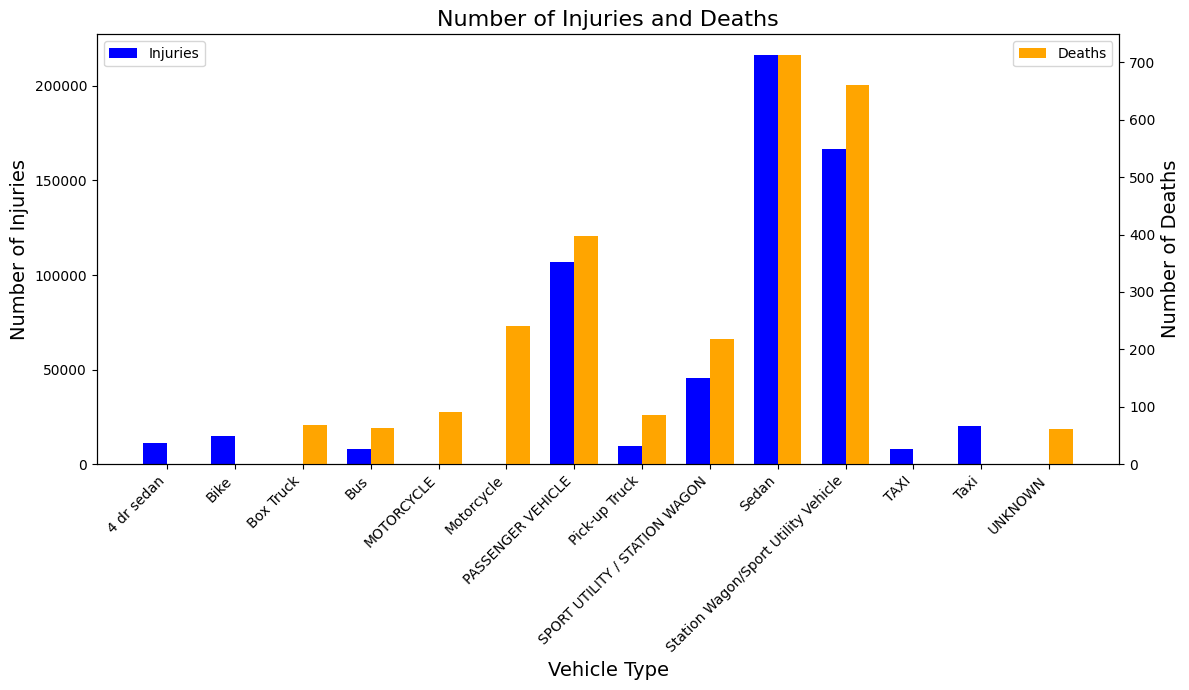

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate top vehicles for injuries
top_vehicles_injuries = data.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS INJURED'].sum().sort_values(ascending=False).head(10)
# Calculate top vehicles for deaths
top_vehicles_deaths = data.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS KILLED'].sum().sort_values(ascending=False).head(10)

# Combine the data into a DataFrame
combined_data = pd.DataFrame({'Injuries': top_vehicles_injuries, 'Deaths': top_vehicles_deaths})

# Set the width of the bars
bar_width = 0.35

# Plotting the combined bar chart with bars next to each other
fig, ax1 = plt.subplots(figsize=(12, 7))

# Generate a list of indices for the x-axis
indices = np.arange(len(combined_data))

# Plotting the bars for injuries
ax1.bar(indices - bar_width/2, combined_data['Injuries'], bar_width, color='blue', label='Injuries')

# Create a secondary y-axis for deaths
ax2 = ax1.twinx()

# Plotting the bars for deaths next to injuries
ax2.bar(indices + bar_width/2, combined_data['Deaths'], bar_width, color='orange', label='Deaths')

# Adding labels and title
ax1.set_title('Number of Injuries and Deaths', fontsize=16)
ax1.set_xlabel('Vehicle Type', fontsize=14)
ax1.set_ylabel('Number of Injuries', fontsize=14)
# TODO: Set the label for the secondary y-axis
ax2.set_ylabel('Number of Deaths', fontsize=14)
ax1.set_xticks(indices)
ax1.set_xticklabels(combined_data.index, rotation=45, ha='right')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjusting layout and displaying the combined chart
plt.tight_layout()
plt.show()




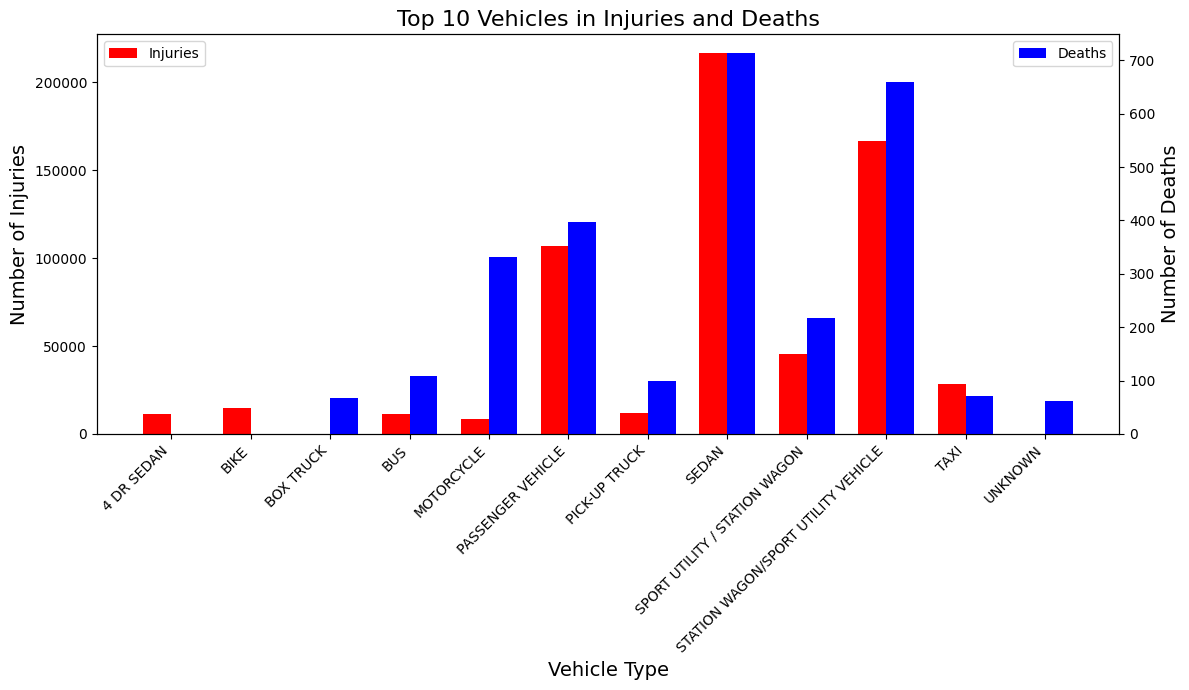

In [ ]:
# TODO: Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# TODO: Convert all variables in a specific column to upper case
data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].str.upper()

# Combine any repetitive variables
vehicle_types_to_combine = ['STATION WAGON/SPORT UTILITY VEHICLE', 'SPORT UTILITY / STATION WAGON']
# TODO: Replace specified values with a common label in a column
data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].replace('Station Wagon/Sport Utility Vehicle', 'SUV/STATION WAGON')
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Re-run code from above
top_vehicles_injuries = data.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS INJURED'].sum().sort_values(ascending=False).head(10)
top_vehicles_deaths = data.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS KILLED'].sum().sort_values(ascending=False).head(10)
combined_data = pd.DataFrame({'Injuries': top_vehicles_injuries, 'Deaths': top_vehicles_deaths})
bar_width = 0.35
fig, ax1 = plt.subplots(figsize=(12, 7))
indices = np.arange(len(combined_data))
ax1.bar(indices - bar_width/2, combined_data['Injuries'], bar_width, color='red', label='Injuries')
ax2 = ax1.twinx()
ax2.bar(indices + bar_width/2, combined_data['Deaths'], bar_width, color='blue', label='Deaths')
ax1.set_title('Top 10 Vehicles in Injuries and Deaths', fontsize=16)
ax1.set_xlabel('Vehicle Type', fontsize=14)
ax1.set_ylabel('Number of Injuries', fontsize=14)
ax2.set_ylabel('Number of Deaths', fontsize=14)
ax1.set_xticks(indices)
ax1.set_xticklabels(combined_data.index, rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


---

##<font color='green'> **Milestone #3 - Advanced Time Series Analysis**</font>
GOAL: The main goal of this milestone is to dive deeper into Time Series Analysis in order to better understand our data's trends over time.

<ipython-input-12-0fac0207e30f>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


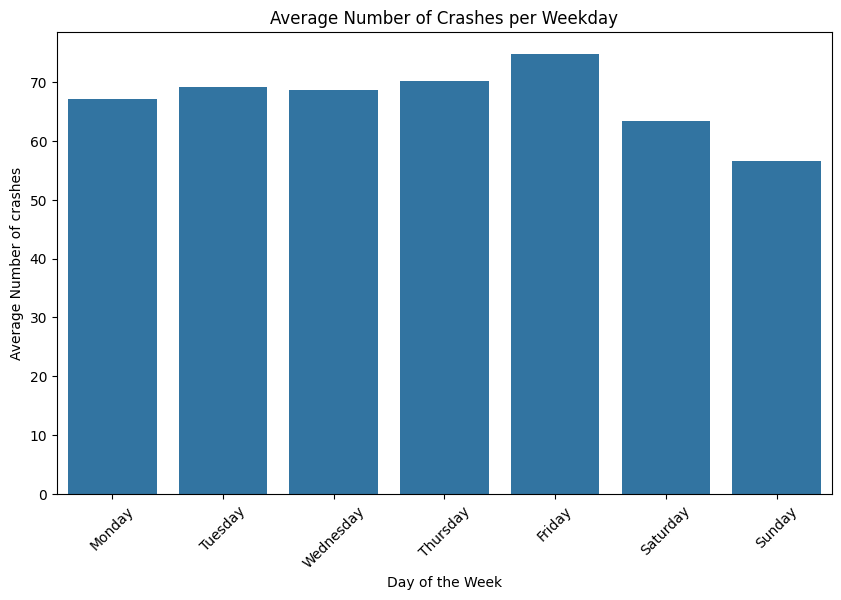

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/Motor_Vehicle_Collisions_-_Crashes_20250110.csv"
data = pd.read_csv(file_path)

# Convert 'CRASH DATE' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Day of the Week Analysis
# Add a new column for the day of the week from 'CRASH DATE'
data['Day of Week'] = data['CRASH DATE'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by 'Day of Week' and calculate the average number of crashes per day
average_crashes_per_weekday = data.groupby('Day of Week').size() / data['CRASH DATE'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(10, 6))
# Plot a bar chart with seaborn
sns.barplot(x=average_crashes_per_weekday.index, y=average_crashes_per_weekday.values, order=day_order)
plt.title('Average Number of Crashes per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of crashes')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

#Count the number of crashes per day
daily_crashes = data.groupby('CRASH DATE').size()

# Perform Augmented Dickey-Fuller test
#  Use adfuller to test if daily crashes are stationary
adf_test = adfuller(daily_crashes)

# Display the ADF test results
# Create a pandas Series to nicely display test results
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

# Print the ADF test output
print(adf_output)


Test Statistic                   -4.730341
p-value                           0.000074
#Lags Used                       32.000000
Number of Observations Used    4540.000000
Critical Value (1%)              -3.431791
Critical Value (5%)              -2.862177
Critical Value (10%)             -2.567109
dtype: float64


In [ ]:
# Apply first differencing
daily_crashes_diff = daily_crashes.diff().dropna()

# Perform Augmented Dickey-Fuller test on the differenced series
#  Use adfuller to test if the differenced series is stationary
adf_test_diff = adfuller(daily_crashes_diff)

# Display the ADF test results for the differenced series
# Create a pandas Series to nicely display test results
adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

# Print the ADF test output for the differenced series
print(adf_output_diff)



Test Statistic                  -19.331623
p-value                           0.000000
#Lags Used                       32.000000
Number of Observations Used    4539.000000
Critical Value (1%)              -3.431792
Critical Value (5%)              -2.862177
Critical Value (10%)             -2.567109
dtype: float64


ARIMA Model for Time Series forecasting.

An ARIMA model, also known as an AutoRegressive Integrated Moving Average model, is a statistical method that allows you to analyze and forecast time series data.

[Review this resource](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) to learn more about the ARIMA model, how to fit the model, and how to configure the model.


In [ ]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1qa8wddx/ps5t3a3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1qa8wddx/w9hrxhe8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27838', 'data', 'file=/tmp/tmp1qa8wddx/ps5t3a3k.json', 'init=/tmp/tmp1qa8wddx/w9hrxhe8.json', 'output', 'file=/tmp/tmp1qa8wddx/prophet_modelongdprgs/prophet_model-20250115164529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:45:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


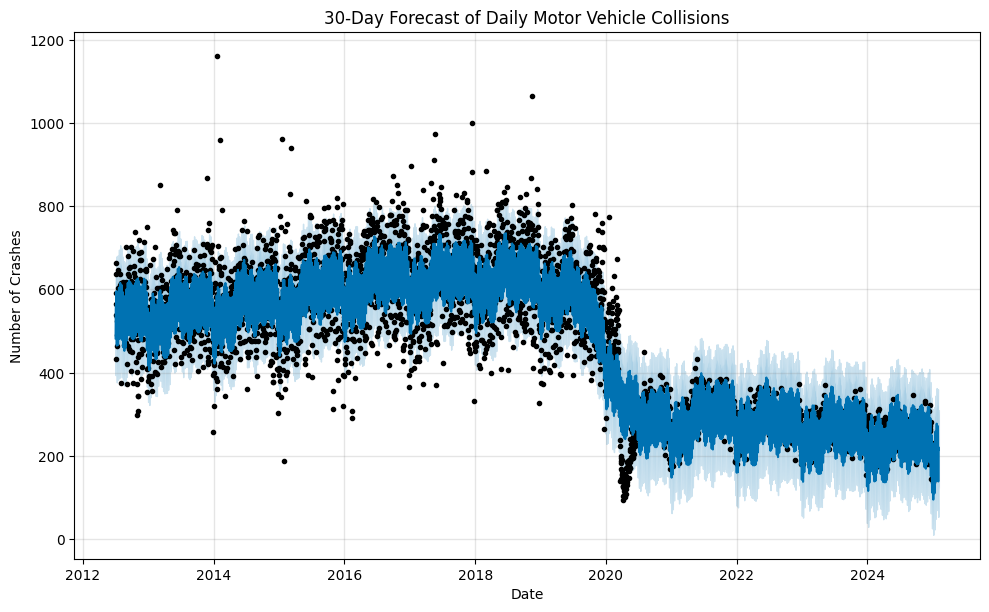

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

#  Convert the 'CRASH DATE' column to datetime format. Replace 'CRASH DATE' if your date column has a different name.
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

#  Group data by 'CRASH DATE' and count the crashes. Assign this to a new DataFrame called 'daily_crashes'.
daily_crashes = data.groupby('CRASH DATE').size().reset_index(name='crash_count')

#  Rename the columns of 'crash_count' to 'y' for Prophet compatibility.
daily_crashes.rename(columns={'CRASH DATE': 'ds', 'crash_count': 'y'}, inplace=True)

model = Prophet()
model.fit(daily_crashes)

#  Create a future dataframe for forecasting the next 30 days and assign it to a variable called 'future'.
future = model.make_future_dataframe(30)

#  Use the model to make predictions on the 'future' DataFrame and store the result in a variable called 'forecast'.
forecast = model.predict(future)

# Plot the forecasted data using the Prophet's built-in plot function.
fig = model.plot(forecast)
plt.title('30-Day Forecast of Daily Motor Vehicle Collisions')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.show()


###Understanding the plot

Black Dots: Each black dot represents the actual number of crashes recorded on a given day.

Dark Blue Line: The dark blue line shows the predicted median number of crashes per day. This is the model's best guess for the central tendency of crashes for future dates.

Light Blue Shaded Area: The light blue shaded area around the dark blue line represents the uncertainty interval of the forecast. The wider this area, the higher the uncertainty. It's usually narrow close to the last observed data point and widens as you move further into the future, indicating increasing uncertainty in the forecast.

Forecast Period: The forecast itself happens after the last available actual data point. If the graph is not clearly demarcated, you would look for the point where there are no more black dots, and the blue line continues. This continuation beyond the last black dot into the light blue area is the forecasted period.

---

##<font color='green'>**Milestone #4 - Spatio-Temporal Analysis**</font>
GOAL: The main goal of this milestone is to explore data that is collected across both space (spatio) and time (temporal), and to get comfortable with spatio-temporal visualizations.

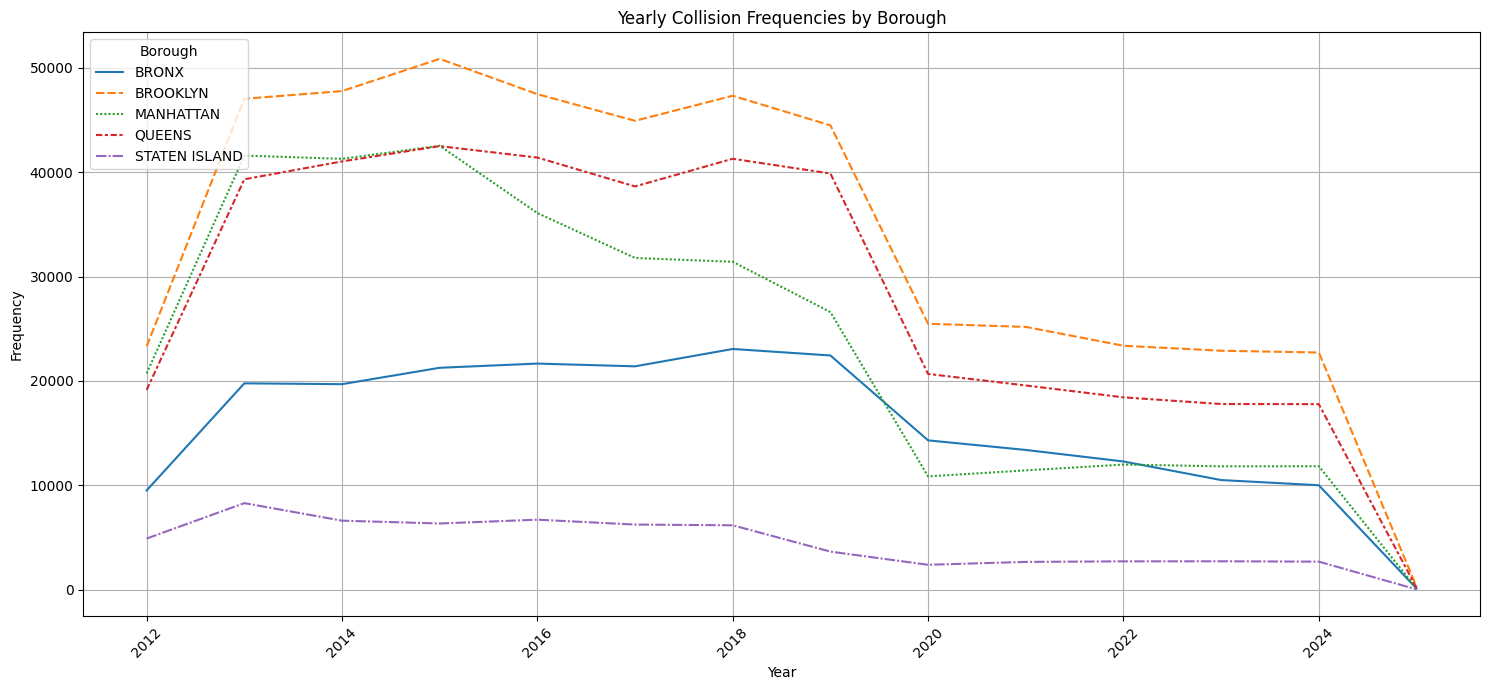

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'CRASH DATE' to datetime and extract year and month for easier analysis
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['YEAR'] = data['CRASH DATE'].dt.year
data['MONTH'] = data['CRASH DATE'].dt.month

# Analyzing collision frequencies over time in different boroughs
# Grouping data by Year and Borough
borough_yearly = data.groupby(['YEAR', 'BOROUGH']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(15, 7))
# Use seaborn to create a line plot
sns.lineplot(data=borough_yearly)
plt.title('Yearly Collision Frequencies by Borough')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Borough', loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


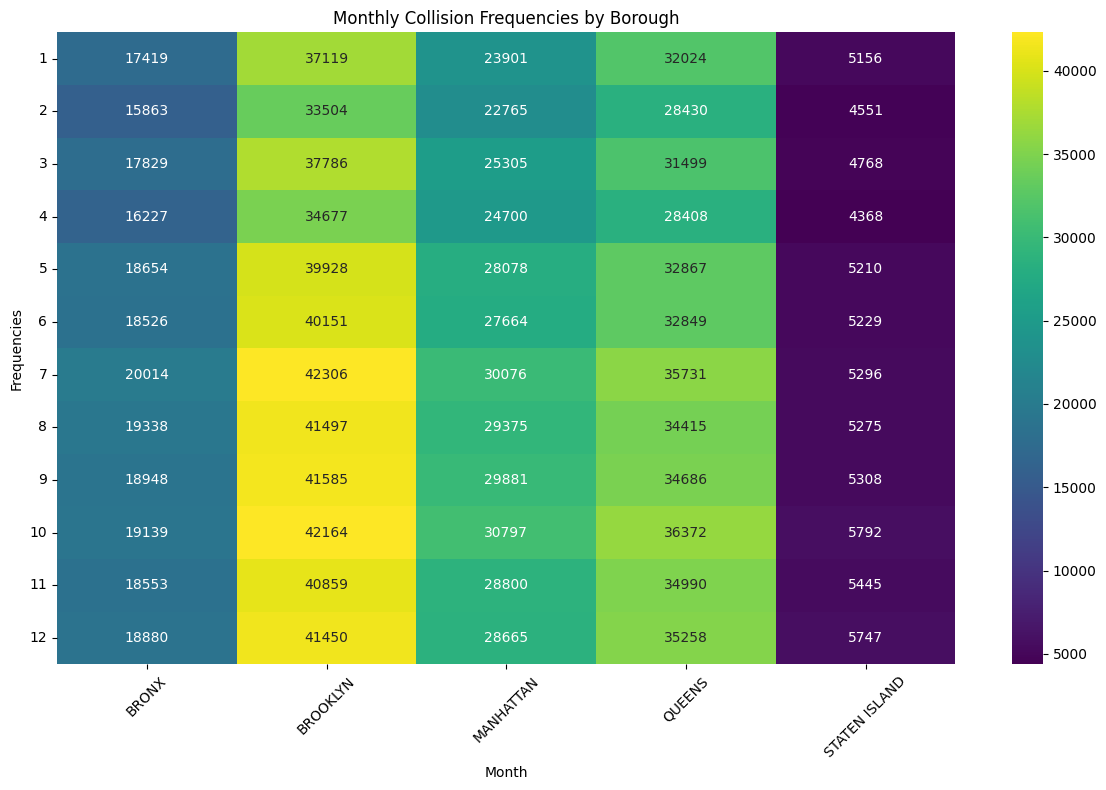

In [ ]:
# Analyzing specific times or locations with unusually high numbers of crashes
# For this, we will use a heatmap to visualize the distribution of crashes by month and borough

# Grouping data by Month and Borough
borough_monthly = data.groupby(['MONTH', 'BOROUGH']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
# Create a heatmap to visualize the frequencies
sns.heatmap(borough_monthly, cmap='viridis', annot=True, fmt='d')
plt.title('Monthly Collision Frequencies by Borough')
plt.ylabel('Frequencies')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


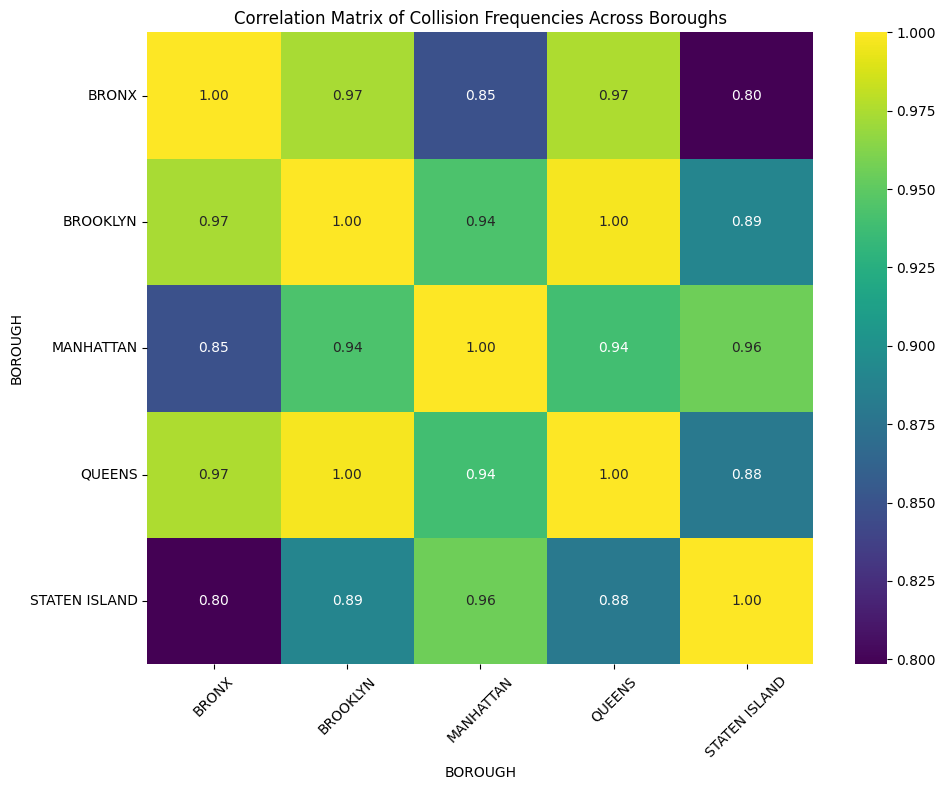

In [ ]:
# Creating a correlation matrix for the number of collisions in different boroughs across different years
correlation_matrix = borough_yearly.corr()

plt.figure(figsize=(10, 8))
#Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Collision Frequencies Across Boroughs')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()



##<font color='green'>**Milestone #5 - Location Inequality**</font>
GOAL: The main goal of this milestone is to think about the implications of this data.



Is there any location inequality in terms of automobile crash rates, pedestrian fatality and injury? What is the relationship between pedestrian fatalities and neighborhood poverty of residence?




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00
[25, 45, 55, 60, 105, 110, 130, 180, 305, 355]


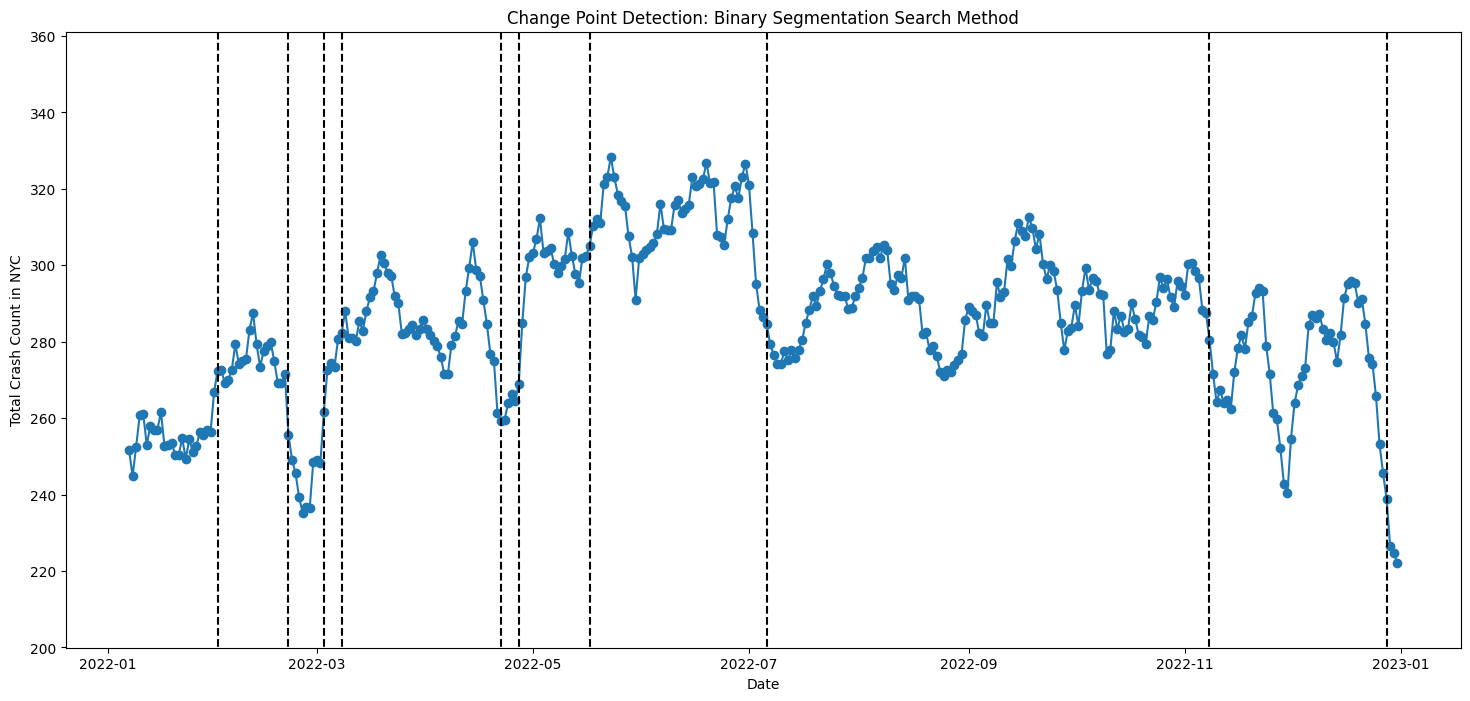

In [ ]:
# install and import the package for the change-of-point detection
!pip install ruptures
import ruptures as rpt

# aggrate the total crash by dates
Counts=data["CRASH DATE"].value_counts()
Counts.index = pd.to_datetime(Counts.index)
Counts.sort_index(inplace=True)
Counts_2022 = Counts.loc['2022-01-01':'2022-12-31'].rolling(7).mean().dropna()


# implement the algorithm
model = "l2"
algo = rpt.Binseg(model=model).fit(Counts_2022.to_numpy())
my_bkps = algo.predict(n_bkps=10)
# show results
fig, ax = plt.subplots(figsize=(18,8))
ax = plt.gca()
ax.plot_date(Counts_2022.index, Counts_2022.to_numpy(), linestyle='solid')
#rpt.show.display(Counts_2022.to_numpy(), my_bkps, figsize=(10, 6))
plt.ylim([0.9*Counts_2022.min(), 1.1*Counts_2022.max()])

# changing point
my_bkps.pop()
for ix in my_bkps:
    plt.plot([Counts_2022.index[ix], Counts_2022.index[ix]], [0,1000], '--k')

plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.ylabel("Total Crash Count in NYC")
plt.xlabel("Date")
print(my_bkps)

##<font color='green'>**Milestone #6 - Potential Interventions**</font>

GOAL: The main goal of this milestone is to think about the recommendations and possible interventions that we make offer based on our analysis.

In [ ]:
df18 = data.loc[data["CRASH DATE"].dt.year == 2018].reset_index(drop = True)
df18 = df18.dropna(subset="ZIP CODE")
df18["ZIP CODE"] = df18["ZIP CODE"].astype(int)
df18_sort = df18.groupby(['ZIP CODE']).count().sort_values(by = 'CRASH DATE', ascending = False).iloc[0: 10]
df18_sort

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR,MONTH
ZIP CODE,,,,,,,,,,,,,,,,,,,,,
11207,2721,2721,2721,2656,2656,2656,1703,1703,1018,2721,...,39,10,2721,2699,2083,181,36,10,2721,2721
11236,2150,2150,2150,2136,2136,2136,1332,1332,818,2150,...,49,13,2150,2133,1651,168,44,12,2150,2150
11234,2028,2028,2028,1989,1989,1989,1343,1341,685,2028,...,39,9,2028,2014,1625,138,38,9,2028,2028
11385,1996,1996,1996,1962,1962,1962,1152,1151,844,1996,...,21,8,1996,1973,1439,102,20,7,1996,1996
10019,1917,1917,1917,1412,1412,1412,1182,1182,735,1917,...,7,1,1917,1908,1660,48,7,1,1917,1917
11101,1867,1867,1867,1813,1813,1813,1534,1534,333,1867,...,11,4,1867,1859,1511,75,11,4,1867,1867
11434,1815,1815,1815,1786,1786,1786,1471,1459,344,1815,...,32,13,1815,1808,1412,127,31,13,1815,1815
10036,1815,1815,1815,1570,1570,1570,1039,1039,776,1815,...,5,0,1815,1801,1578,49,6,0,1815,1815
11208,1813,1813,1813,1766,1766,1766,1048,1048,765,1813,...,31,11,1813,1798,1264,99,30,11,1813,1813


---
---

---

## 🛺<font color='green'> **Thank you for your interest in my project and my learning journey!**</font> 🛺

